In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=d33146e1d37e7f260bd66789479912fbeb979b2fbb2c31629586088e0bd59129
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [38]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


# **Import Library**

In [51]:
# Import library yang sekiranya dibutuhkan
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from google.colab import files
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from datetime import datetime
import spacy
from langdetect import detect
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Dataset

In [6]:
# Import dataset
uploaded = files.upload()

Saving pppk_guru (1).xlsx to pppk_guru (1).xlsx


In [7]:
# terjadi kesalahan data pada baris yang menyebabkan tidak dapat menampilkan data dengan jelas
# df = pd.read_csv('pppk_guru (1).csv', delimiter=',', encoding='utf-8', error_bad_lines=False)
# df

# Merubah format data menjadi xlsx karena sesuai dengan isinya (no delimited)
df = pd.read_excel('pppk_guru (1).xlsx')
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Mar 12 07:56:50 +0000 2024,1767459722188440064,@Galavalo @Guru_PNS @pppkguru Siap siap biasak...,0,0,0,0,in,88120377,1767456413285260032,zanatul_91,https://twitter.com/zanatul_91/status/17674597...
1,Tue Mar 12 07:43:41 +0000 2024,1767456413285260032,Mungkin scopenya gak bakal cuma sekedar kepsek...,0,1,1,0,in,278921095,1767456413285260032,Galavalo,https://twitter.com/Galavalo/status/1767456413...
2,Tue Mar 12 05:35:44 +0000 2024,1767424215253410048,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,0,1,0,0,in,1568868682776079872,1767422476596999936,cheerfulbliss_,https://twitter.com/cheerfulbliss_/status/1767...
3,Tue Mar 12 05:32:02 +0000 2024,1767423281995689984,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,0,1,0,0,in,1568868682776079872,1767422476596999936,cheerfulbliss_,https://twitter.com/cheerfulbliss_/status/1767...
4,Tue Mar 12 05:29:51 +0000 2024,1767422733976260096,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,0,0,0,0,in,320156431,1767422733976260096,sangyeon_rm,https://twitter.com/sangyeon_rm/status/1767422...


In [8]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           1007 non-null   object
 1   id_str               1007 non-null   int64 
 2   full_text            1007 non-null   object
 3   quote_count          1007 non-null   int64 
 4   reply_count          1007 non-null   int64 
 5   retweet_count        1007 non-null   int64 
 6   favorite_count       1007 non-null   int64 
 7   lang                 1007 non-null   object
 8   user_id_str          1007 non-null   int64 
 9   conversation_id_str  1007 non-null   int64 
 10  username             1007 non-null   object
 11  tweet_url            1007 non-null   object
dtypes: int64(7), object(5)
memory usage: 94.5+ KB


# **Data Cleaning**

In [10]:
# Cek duplikat data
duplicate_rows = df[df.duplicated()]

print("Baris Duplikat:")
print(duplicate_rows)

Baris Duplikat:
Empty DataFrame
Columns: [created_at, id_str, full_text, quote_count, reply_count, retweet_count, favorite_count, lang, user_id_str, conversation_id_str, username, tweet_url]
Index: []


In [11]:
# Menghapus kolom-kolom yang tidak dibutuhkan
kolom_tidak_dibutuhkan = ['id_str', 'user_id_str', 'conversation_id_str', 'username', 'tweet_url']
df_cleaned = df.drop(kolom_tidak_dibutuhkan, axis=1)
df_new = df_cleaned
df_new.head()

,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count,lang
0,Tue Mar 12 07:56:50 +0000 2024,@Galavalo @Guru_PNS @pppkguru Siap siap biasak...,0,0,0,0,in
1,Tue Mar 12 07:43:41 +0000 2024,Mungkin scopenya gak bakal cuma sekedar kepsek...,0,1,1,0,in
2,Tue Mar 12 05:35:44 +0000 2024,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,0,1,0,0,in
3,Tue Mar 12 05:32:02 +0000 2024,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,0,1,0,0,in
4,Tue Mar 12 05:29:51 +0000 2024,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,0,0,0,0,in


In [12]:
# Fungsi untuk memisahkan data waktu
def pemisahan_waktu(waktu_string):
    waktu_objek = datetime.strptime(waktu_string, "%a %b %d %H:%M:%S %z %Y")
    return waktu_objek

# Memisahkan data waktu dalam DataFrame
df_new['created_at'] = df_new['created_at'].apply(pemisahan_waktu)

# Memisahkan komponen waktu
df_new['tahun'] = df_new['created_at'].dt.year
df_new['bulan'] = df_new['created_at'].dt.month
df_new['tanggal'] = df_new['created_at'].dt.day
df_new['jam'] = df_new['created_at'].dt.hour
df_new['menit'] = df_new['created_at'].dt.minute
df_new['detik'] = df_new['created_at'].dt.second

# Tampilkan DataFrame hasil pemisahan
print(df_new)

                    created_at  \
0    2024-03-12 07:56:50+00:00   
1    2024-03-12 07:43:41+00:00   
2    2024-03-12 05:35:44+00:00   
3    2024-03-12 05:32:02+00:00   
4    2024-03-12 05:29:51+00:00   
...                        ...   
1002 2024-02-20 08:46:05+00:00   
1003 2024-02-20 08:25:14+00:00   
1004 2024-02-20 07:19:43+00:00   
1005 2024-02-20 07:16:55+00:00   
1006 2024-02-20 07:13:22+00:00   

                                              full_text  quote_count  \
0     @Galavalo @Guru_PNS @pppkguru Siap siap biasak...            0   
1     Mungkin scopenya gak bakal cuma sekedar kepsek...            0   
2     Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...            0   
3     Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...            0   
4     Whistlist 2024  1. Lolos pppk guru 2. Ganti ka...            0   
...                                                 ...          ...   
1002  @pppkguru Apa? Dapat transport? ITU KAN SUDAH ...            0   
1003  @pppkguru

In [14]:
# Fungsi untuk menghapus kata-kata yang diawali dengan tanda '@' (mengandung username)
def hapus_username(text):
    return re.sub(r'@\w+\s*', '', text)

# Terapkan fungsi pada kolom 'full_text' dan simpan hasilnya pada kolom 'tweet'
df_new['tweet'] = df_new['full_text'].apply(hapus_username)

# Tampilkan DataFrame setelah penghapusan
print(df_new[['full_text', 'tweet']])

                                              full_text  \
0     @Galavalo @Guru_PNS @pppkguru Siap siap biasak...   
1     Mungkin scopenya gak bakal cuma sekedar kepsek...   
2     Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...   
3     Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...   
4     Whistlist 2024  1. Lolos pppk guru 2. Ganti ka...   
...                                                 ...   
1002  @pppkguru Apa? Dapat transport? ITU KAN SUDAH ...   
1003  @pppkguru Walas sering dimanpaatin guru BK ttd...   
1004  @ArisPriyono_SPd Betul, tapi Guru itu emang me...   
1005  @robi_zamzam Guru sekarang pakenya PPPK Yg PNS...   
1006  @mnaf_gr @Guru_PNS @8UkXK3beBNDzo4v @pppkguru ...   

                                                  tweet  
0                         Siap siap biasakan siap salah  
1     Mungkin scopenya gak bakal cuma sekedar kepsek...  
2     Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...  
3     Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...  
4

In [15]:
# Data terbaru yang akan digunakan
data_pilih = ['created_at', 'full_text']
df_cleaned = df_new.drop(data_pilih, axis=1)
df_new = df_cleaned
df_new.head()

,quote_count,reply_count,retweet_count,favorite_count,lang,tahun,bulan,tanggal,jam,menit,detik,tweet
0,0,0,0,0,in,2024,3,12,7,56,50,Siap siap biasakan siap salah
1,0,1,1,0,in,2024,3,12,7,43,41,Mungkin scopenya gak bakal cuma sekedar kepsek...
2,0,1,0,0,in,2024,3,12,5,35,44,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...
3,0,1,0,0,in,2024,3,12,5,32,2,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...
4,0,0,0,0,in,2024,3,12,5,29,51,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...


In [16]:
# Mengurutkan data agar mudah dibaca
df_new = df_new[['tweet', 'lang', 'tahun', 'bulan', 'tanggal', 'jam', 'menit', 'detik',
                      'quote_count', 'reply_count', 'retweet_count', 'favorite_count']]

# Mengubah nama kolom 'lang' menjadi 'bahasa'
df_new = df_new.rename(columns={'lang': 'bahasa'})

# Tampilkan DataFrame baru dengan urutan kolom yang diinginkan
df_new.head()

,tweet,bahasa,tahun,bulan,tanggal,jam,menit,detik,quote_count,reply_count,retweet_count,favorite_count
0,Siap siap biasakan siap salah,in,2024,3,12,7,56,50,0,0,0,0
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,in,2024,3,12,7,43,41,0,1,1,0
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,in,2024,3,12,5,35,44,0,1,0,0
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,in,2024,3,12,5,32,2,0,1,0,0
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,in,2024,3,12,5,29,51,0,0,0,0


In [17]:
df_new['bahasa'].unique()

array(['in', 'en', 'qme', 'et', 'tl', 'qam', 'is', 'und', 'ro', 'pt',
       'pl', 'tr', 'sv', 'es'], dtype=object)

Setelah dilakukan pengecekan kembali, terdapat kejanggalan pada bahasa tweet. Dimana nilai **uniqe** pada data **'bahasa'** diantaranya secara penjelasan adalah:
- 'in': Bahasa Indonesia
- 'en': Bahasa Inggris
- 'qme': Mungkin merupakan kode yang tidak dikenali, karena tidak ada bahasa yang dikenal dengan kode tersebut dalam standar ISO 639.
- 'et': Bahasa Estonia
- 'tl': Bahasa Tagalog (Filipina)
- 'qam': Mungkin merupakan kode yang tidak dikenali, karena tidak ada bahasa yang dikenal dengan kode tersebut dalam standar ISO 639.
- 'is': Bahasa Islandia
- 'und': Bahasa Tidak Diketahui (biasanya digunakan untuk teks yang tidak dapat diidentifikasi bahasanya)
- 'ro': Bahasa Rumania
- 'pt': Bahasa Portugis
- 'pl': Bahasa Polandia
- 'tr': Bahasa Turki
- 'sv': Bahasa Swedia
- 'es': Bahasa Spanyol

Jadi, bahasa yang teridentifikasi dalam daftar tersebut adalah:
1. Bahasa Indonesia ('in')
2. Bahasa Inggris ('en')
3. Bahasa Estonia ('et')
4. Bahasa Tagalog (Filipina) ('tl')
5. Bahasa Islandia ('is')
6. Bahasa Rumania ('ro')
7. Bahasa Portugis ('pt')
8. Bahasa Polandia ('pl')
9. Bahasa Turki ('tr')
10. Bahasa Swedia ('sv')
11. Bahasa Spanyol ('es')

Kode **'qme'** dan **'qam'** tidak terdaftar dalam standar ISO 639, jadi tidak ada informasi resmi tentang bahasa mana yang diwakili oleh kode-kode tersebut.

In [19]:
# Cek data yang memiliki kode 'qme' dan 'qam'
result = df_new.query("bahasa == 'qme' or bahasa == 'qam'")
result

,tweet,bahasa,tahun,bulan,tanggal,jam,menit,detik,quote_count,reply_count,retweet_count,favorite_count
81,https://t.co/XdS4TAkQ5x,qme,2024,3,8,15,23,23,0,0,0,0
127,ðŸ™ðŸ™ðŸ™,qme,2024,3,7,13,10,10,0,0,0,0
134,ðŸ˜…ðŸ˜…ðŸ˜…,qme,2024,3,7,10,38,33,0,0,0,1
142,https://t.co/tQwaDdMmS5,qme,2024,3,7,7,5,21,0,0,0,0
415,,qam,2024,3,1,23,55,57,0,0,0,0
500,ðŸ˜ŒðŸ˜ŒðŸ˜ŒðŸ˜Œ,qme,2024,3,1,0,28,20,0,0,0,0
518,https://t.co/LjGudFfANr,qme,2024,2,29,21,53,6,0,0,0,0
621,ðŸƒðŸ»â€â™‚ï¸ðŸƒðŸ»â€â™‚ï¸ðŸƒðŸ»â€â...,qme,2024,2,27,14,18,23,0,1,0,0
654,ðŸ¤£ðŸ¤£ðŸ¤£,qme,2024,2,27,6,5,24,0,0,0,0
749,ðŸ˜‚ðŸ˜‚ðŸ˜‚,qme,2024,2,25,14,38,47,0,0,0,0


In [20]:
# Menghapus data dengan kode 'qme' atau 'qam' dari dataframe
df_new = df_new.drop(result.index)
df_new

,tweet,bahasa,tahun,bulan,tanggal,jam,menit,detik,quote_count,reply_count,retweet_count,favorite_count
0,Siap siap biasakan siap salah,in,2024,3,12,7,56,50,0,0,0,0
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,in,2024,3,12,7,43,41,0,1,1,0
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,in,2024,3,12,5,35,44,0,1,0,0
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,in,2024,3,12,5,32,2,0,1,0,0
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,in,2024,3,12,5,29,51,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Apa? Dapat transport? ITU KAN SUDAH JADI TUGAS...,in,2024,2,20,8,46,5,0,0,0,0
1003,"Walas sering dimanpaatin guru BK ttd doang, du...",in,2024,2,20,8,25,14,0,0,0,0
1004,"Betul, tapi Guru itu emang mengemban tugas tek...",in,2024,2,20,7,19,43,2,2,2,10
1005,Guru sekarang pakenya PPPK Yg PNS gak ada separo,in,2024,2,20,7,16,55,0,2,0,0


In [21]:
df_new.info

<bound method DataFrame.info of                                                   tweet bahasa  tahun  bulan  \
0                         Siap siap biasakan siap salah     in   2024      3   
1     Mungkin scopenya gak bakal cuma sekedar kepsek...     in   2024      3   
2     Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...     in   2024      3   
3     Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...     in   2024      3   
4     Whistlist 2024  1. Lolos pppk guru 2. Ganti ka...     in   2024      3   
...                                                 ...    ...    ...    ...   
1002  Apa? Dapat transport? ITU KAN SUDAH JADI TUGAS...     in   2024      2   
1003  Walas sering dimanpaatin guru BK ttd doang, du...     in   2024      2   
1004  Betul, tapi Guru itu emang mengemban tugas tek...     in   2024      2   
1005   Guru sekarang pakenya PPPK Yg PNS gak ada separo     in   2024      2   
1006                                              Amiin     in   2024      2   

      tanggal  jam  menit  detik  quote_count  reply_count  retweet_count  \
0          12    7     56     50            0            0              0   
1          12    7     43     41            0            1              1   
2          12    5     35     44            0            1              0   
3          12    5     32      2            0            1              0   
4          12    5     29     51            0            0              0   
...       ...  ...    ...    ...          ...          ...            ...   
1002       20    8     46      5            0            0              0   
1003       20    8     25     14            0            0              0   
1004       20    7     19     43            2            2              2   
1005       20    7     16     55            0            2              0   
1006       20    7     13     22            0            0              0   

      favorite_count  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1002               0  
1003               0  
1004              10  
1005               0  
1006               0  

[994 rows x 12 columns]>

Pada proses cleaning selanjutnya saya hanya memfokuskan pada tweet yang berbahasa Indonesia, maka sebelum membentuk sebuah wordcloud saya menampilkan kolom tweet saja.

In [29]:
# Menampilkan kolom 'tweet'
df_tweet = df_new.query("bahasa == 'in'")[['tweet']]
df_tweet

,tweet
0,Siap siap biasakan siap salah
1,Mungkin scopenya gak bakal cuma sekedar kepsek...
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...
...,...
1002,Apa? Dapat transport? ITU KAN SUDAH JADI TUGAS...
1003,"Walas sering dimanpaatin guru BK ttd doang, du..."
1004,"Betul, tapi Guru itu emang mengemban tugas tek..."
1005,Guru sekarang pakenya PPPK Yg PNS gak ada separo


Pada tabel diatas dapat dilihat bahwa tweet yang dimiliki akun warga negara Indonesia memiliki tweet sebanyak 966 tweet.

In [30]:
# Membuat fungsi untuk membersihkan tweet
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

In [31]:
# Merubah teks menjadi huruf kecil semua
df_tweet['tweet_clean'] = df_tweet['tweet'].apply(cleaningText)
df_tweet['tweet_clean'] = df_tweet['tweet_clean'].apply(casefoldingText)
df_tweet.head()

,tweet,tweet_clean
0,Siap siap biasakan siap salah,siap siap biasakan siap salah
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,mungkin scopenya gak bakal cuma sekedar kepsek...
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,buku pppk panduan lolos tes pppk untuk guru ...
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,kompas ilmu buku panduan wajib pppk soal tes ...
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,whistlist lolos pppk guru ganti kasur âœ”ï...


In [60]:
# Bersihkan emoticon dulu (memastikan pembersihan data jika terdapat emoticon)
def clean_emoticons(text):
    # Definisikan pola emoticon dengan regular expression
    emoticon_pattern = re.compile(
        r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]',
        flags=re.UNICODE
    )

    # Ganti emoticon dengan string kosong
    cleaned_text = emoticon_pattern.sub('', text)

    return cleaned_text

# Contoh penggunaan pada kolom 'Message'
df_tweet['tweet_clean'] = df_tweet['tweet_clean'].apply(clean_emoticons)
df_tweet.head()

,tweet,tweet_clean,tweet_clean2,tweet_clean3
0,Siap siap biasakan siap salah,siap siap biasakan siap salah,biasakan salah,"[biasa, salah]"
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,mungkin scopenya gak bakal cuma sekedar kepsek...,scopenya gak sekedar kepsek cuman bayangin aja...,"[scopenya, gak, dar, kepsek, cuman, bayangin, ..."
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,buku pppk panduan lolos tes pppk untuk guru ...,buku pppk panduan lolos tes pppk guru tenaga p...,"[buku, pppk, pandu, lolos, tes, pppk, guru, te..."
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,kompas ilmu buku panduan wajib pppk soal tes ...,kompas ilmu buku panduan wajib pppk tes pppk t...,"[kompas, ilmu, buku, pandu, wajib, pppk, tes, ..."
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,whistlist lolos pppk guru ganti kasur âœ”ï...,whistlist lolos pppk guru ganti kasur âœ”ï¸ b...,"[whistlist, lolos, pppk, guru, ganti, kasur, b..."


In [55]:
# Definisi daftar stopwords untuk bahasa Indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

# Fungsi untuk membersihkan teks dari stopwords
def clean_text(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Membersihkan teks dari stopwords untuk bahasa Indonesia
df_tweet['tweet_clean2'] = df_tweet['tweet_clean'].apply(lambda x: clean_text(x, stopwords_indonesia))
df_tweet

,tweet,tweet_clean,tweet_clean2,tweet_clean3
0,Siap siap biasakan siap salah,siap siap biasakan siap salah,biasakan salah,"[biasa, salah]"
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,mungkin scopenya gak bakal cuma sekedar kepsek...,scopenya gak sekedar kepsek cuman bayangin aja...,"[scopenya, gak, dar, kepsek, cuman, bayangin, ..."
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,buku pppk panduan lolos tes pppk untuk guru ...,buku pppk panduan lolos tes pppk guru tenaga p...,"[buku, pppk, pandu, lolos, tes, pppk, guru, te..."
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,kompas ilmu buku panduan wajib pppk soal tes ...,kompas ilmu buku panduan wajib pppk tes pppk t...,"[kompas, ilmu, buku, pandu, wajib, pppk, tes, ..."
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,whistlist lolos pppk guru ganti kasur âœ”ï...,whistlist lolos pppk guru ganti kasur âœ”ï¸ b...,"[whistlist, lolos, pppk, guru, ganti, kasur, b..."
...,...,...,...,...
1002,Apa? Dapat transport? ITU KAN SUDAH JADI TUGAS...,apa dapat transport itu kan sudah jadi tugas d...,transport tugas tanggung dih digaji ðÿ”¥ðÿ”¥ðÿ”¥,"[transport, tugas, tanggung, dih, gaji]"
1003,"Walas sering dimanpaatin guru BK ttd doang, du...",walas sering dimanpaatin guru bk ttd doang dui...,walas dimanpaatin guru bk ttd doang duit kagak,"[walas, dimanpaatin, guru, bk, ttd, doang, dui..."
1004,"Betul, tapi Guru itu emang mengemban tugas tek...",betul tapi guru itu emang mengemban tugas tekn...,guru emang mengemban tugas teknis tugas manaje...,"[guru, emang, emban, tugas, teknis, tugas, man..."
1005,Guru sekarang pakenya PPPK Yg PNS gak ada separo,guru sekarang pakenya pppk yg pns gak ada separo,guru pakenya pppk yg pns gak separo,"[guru, pakenya, pppk, yg, pns, gak, paro]"


In [63]:
# Melakukan pembersihan kata kembali dengan stopsords manual
stopword=['gue','gw','user','gak','gk','yang','yg','lu','ya','si','jd','jadi','apa','ap','ama','iya','lbh',
         'jd','kalo','klo','tdk','tidak','nya','ny','tuh','sih','sdh','udah','udh','langsung','mah','bang',
         'url','loe','lo','deh','dh','tp','tapi','emg','emang','ah','aja','aj','ke','dah','eh','gimana',
         'jg','juga','jgn','g','ga','nih','ni','tu', 'banget','bgt','gk','harus','hrs','biar','gini','ttp',
         'dr','dari','dri','ente','tentang','ttg','sudah','di', 'amp','semua','kalau','tau','lg','karna',
         'mau','masih','msh','cuma','cm','sj','saja','dengan','dgn','dlu','dulu','dl','sok','karena','luh',
         'kan','it','itu','buat','tak','oleh','km','kamu','kmu','kali','kayak','bikin','bkn','loh','bener',
         'trus','terus','gua','dasar','kau','orang','liat','lihat','masuk','org','ulang','wkwkwk','gmnin',
         'dapat','dpt','pd','pada','x','isi','itu','it','kek','spt','suka','mending','jan','hauahahaha','o',
         'wes','sisan','gih','woy','woii','aje','rp','klw','mudah','ngapain','kek','skrg','sby','lbh','mrk',
         'ngak','bang','habishabisan','hp','sgala','segala','pake','pke','ttp','hti','elo','ta','wk','cari',
         'udik','haha','sampe','kl','ma','dsna','stlh','setelah','ajk','ajak', 'wkwkwk', 'kek', 'kok', 'eee',
          'awkwkwkw', 'nya', 'serta', 'ini', 'ni', 'jdi', 'ku', 'gtu', 'ada', 'aku', 'dia', 'atau', 'dan',
          'biar', 'tuh', 'jd', 'jadi', 'usul', 'laku', 'th', 'tuh', 'gtu', 'gitu']

def clean_key(text):
    text=' '.join(word for word in text.split() if word not in stopword)
    return text
df_tweet['tweet_clean2'] = df_tweet['tweet_clean2'].apply(clean_key)
df_tweet.head()

,tweet,tweet_clean,tweet_clean2,tweet_clean3
0,Siap siap biasakan siap salah,siap siap biasakan siap salah,biasakan salah,"[biasa, salah]"
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,mungkin scopenya gak bakal cuma sekedar kepsek...,scopenya sekedar kepsek cuman bayangin capeâ² ...,"[scopenya, gak, dar, kepsek, cuman, bayangin, ..."
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,buku pppk panduan lolos tes pppk untuk guru ...,buku pppk panduan lolos tes pppk guru tenaga p...,"[buku, pppk, pandu, lolos, tes, pppk, guru, te..."
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,kompas ilmu buku panduan wajib pppk soal tes ...,kompas ilmu buku panduan wajib pppk tes pppk t...,"[kompas, ilmu, buku, pandu, wajib, pppk, tes, ..."
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,whistlist lolos pppk guru ganti kasur âœ”ï...,whistlist lolos pppk guru ganti kasur âœ”ï¸ b...,"[whistlist, lolos, pppk, guru, ganti, kasur, b..."


In [64]:
def filteringText(text):
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Menghapus stopwords menggunakan Sastrawi
    cleaned_text = stopword_remover.remove(text)

    # Mengembalikan teks yang telah dibersihkan ke dalam bentuk list
    return cleaned_text.split()

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Melakukan stemming pada teks
    stemmed_text = stemmer.stem(text)

    # Mengembalikan teks yang telah distem ke dalam bentuk list
    return stemmed_text.split()

In [66]:
# Membersihkan teks dari stopwords dan melakukan stemming pada kolom 'tweet_clean2'
df_tweet['tweet_clean3(new)'] = df_tweet['tweet_clean2'].apply(filteringText)
df_tweet['tweet_clean3(new)'] = df_tweet['tweet_clean2'].apply(stemmingText)

df_tweet.head()

,tweet,tweet_clean,tweet_clean2,tweet_clean3,tweet_clean3(new)
0,Siap siap biasakan siap salah,siap siap biasakan siap salah,biasakan salah,"[biasakan, salah]","[biasa, salah]"
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,mungkin scopenya gak bakal cuma sekedar kepsek...,scopenya sekedar kepsek cuman bayangin capeâ² ...,"[scopenya, sekedar, kepsek, cuman, bayangin, c...","[scopenya, dar, kepsek, cuman, bayangin, cape,..."
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,buku pppk panduan lolos tes pppk untuk guru ...,buku pppk panduan lolos tes pppk guru tenaga p...,"[buku, pppk, panduan, lolos, tes, pppk, guru, ...","[buku, pppk, pandu, lolos, tes, pppk, guru, te..."
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,kompas ilmu buku panduan wajib pppk soal tes ...,kompas ilmu buku panduan wajib pppk tes pppk t...,"[kompas, ilmu, buku, panduan, wajib, pppk, tes...","[kompas, ilmu, buku, pandu, wajib, pppk, tes, ..."
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,whistlist lolos pppk guru ganti kasur âœ”ï...,whistlist lolos pppk guru ganti kasur âœ”ï¸ b...,"[whistlist, lolos, pppk, guru, ganti, kasur, â...","[whistlist, lolos, pppk, guru, ganti, kasur, b..."


# **WordCloud Visualization**

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_all (mencakup semua pesan) dan menampilkan kumpulan tweet dari kolom tweet_clean3.

In [69]:
list_all = ''
for i in df_tweet['tweet_clean3(new)']:
    for j in i :
        list_all += ' '+(j)
list_all

' biasa salah scopenya dar kepsek cuman bayangin cape ikut didik guru gerak kepsekpengawasnya briptu aipda y buku pppk pandu lolos tes pppk guru tenaga didik antar pppk materi lengkap paket kompetensi bidang guru uji kompetensi tes wawancara kompas ilmu buku pandu wajib pppk tes pppk tenaga teknis guru medis whistlist lolos pppk guru ganti kasur beli divan ganti series s iphone gaji pokok nadiem makarim tambah hasil guru pppk non sertifikasi nasib guru pppk nyaleg putus pemkab karanganyar mendikbud ristek nadiem makarim guru honorer lulus seleksi guru asn pppk dasar data ubah signifikan guru honorer asn pppk ribu guru honorer resmi gabung asn pppk komitmen kemendikbudristek guru honorer asn pppk juang bayar guru honorer capai impi asn pppk alhamdulillan ribu guru honorer jamin sejahtera asn pppk efek butuh pokok hasil rendah gampang emosi mngkin tmn paham tmt sk jabfung juli aju ekin periode trnyata hnya anggap bln krna tmt jbfung juli atur kerja tahun cma anggap bln mendikbudristek te

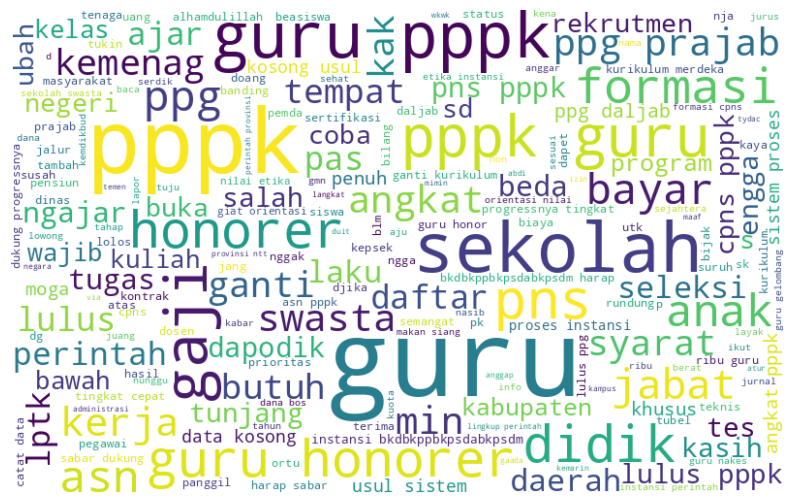

In [76]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_all)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Pada visualisasi sebelumnya terdapat kesalahan, dimana terdapat kata yang muncul lebih dari satu kali dengan frekuensi berbeda. Seharusnya, pada wordcloud hanya menampilkan satu kata dari masing-masing kata yang berbeda dalam kemunculannya dan memiliki frekuensi yang berbeda-beda pula. Maka dari itu, untuk mengatasi masalah kata-kata yang muncul lebih dari sekali dengan frekuensi yang berbeda saya menggunakan **Normalisasi Frekuensi**.

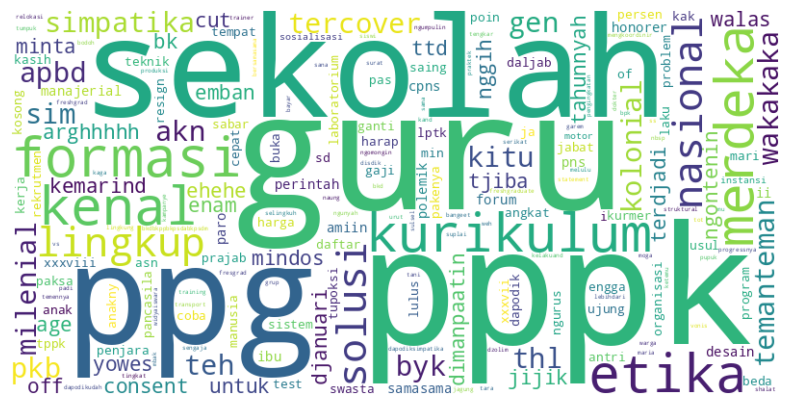

In [87]:
list_kata = list_all

# Menghitung frekuensi kemunculan kata-kata
frekuensi = {}
kata_kunci = list_kata.split()
for kata in kata_kunci:
    frekuensi[kata] = frekuensi.get(kata, 0) + 1

# Normalisasi frekuensi atau pengaturan bobot
normalisasi_frekuensi = {kata: frekuensi[kata] for kata in frekuensi}
# Contoh normalisasi sederhana, bisa disesuaikan dengan kebutuhan
for kata in normalisasi_frekuensi:
    normalisasi_frekuensi[kata] = normalisasi_frekuensi[kata] / max(normalisasi_frekuensi.values())

# Membuat objek WordCloud dengan menggunakan normalisasi frekuensi
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(normalisasi_frekuensi)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Evaluasi Model (Model Evaluation)**

In [120]:
# Library yang digunakan
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns  # Menambahkan ini untuk mengimpor Seaborn
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [95]:
# Data yang digunakan
df2 = df_new
df2.head()

,tweet,bahasa,tahun,bulan,tanggal,jam,menit,detik,quote_count,reply_count,retweet_count,favorite_count
0,Siap siap biasakan siap salah,in,2024,3,12,7,56,50,0,0,0,0
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,in,2024,3,12,7,43,41,0,1,1,0
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,in,2024,3,12,5,35,44,0,1,0,0
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,in,2024,3,12,5,32,2,0,1,0,0
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,in,2024,3,12,5,29,51,0,0,0,0


## Melatih model Machine Learning pada data teks menggunakan pendekatan TF-IDF dan Logistic Regression untuk klasifikasi tweet berdasarkan bahasa.

In [96]:
# Melakukan pemrosesan teks
# Misalnya: tokenisasi, membersihkan teks, dan ekstraksi fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df2['tweet'])
y = df2['bahasa']
y

0       in
1       in
2       in
3       in
4       in
        ..
1002    in
1003    in
1004    in
1005    in
1006    in
Name: bahasa, Length: 994, dtype: object

In [97]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [99]:
# Memprediksi kelas data uji
y_pred = model.predict(X_test)
y_pred

array(['in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'i

In [100]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.96


In [101]:
# Melihat laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          en       0.00      0.00      0.00         1
          et       0.00      0.00      0.00         2
          in       0.96      1.00      0.98       191
          pl       0.00      0.00      0.00         1
          pt       0.00      0.00      0.00         1
          tl       0.00      0.00      0.00         2
         und       0.00      0.00      0.00         1

    accuracy                           0.96       199
   macro avg       0.14      0.14      0.14       199
weighted avg       0.92      0.96      0.94       199



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


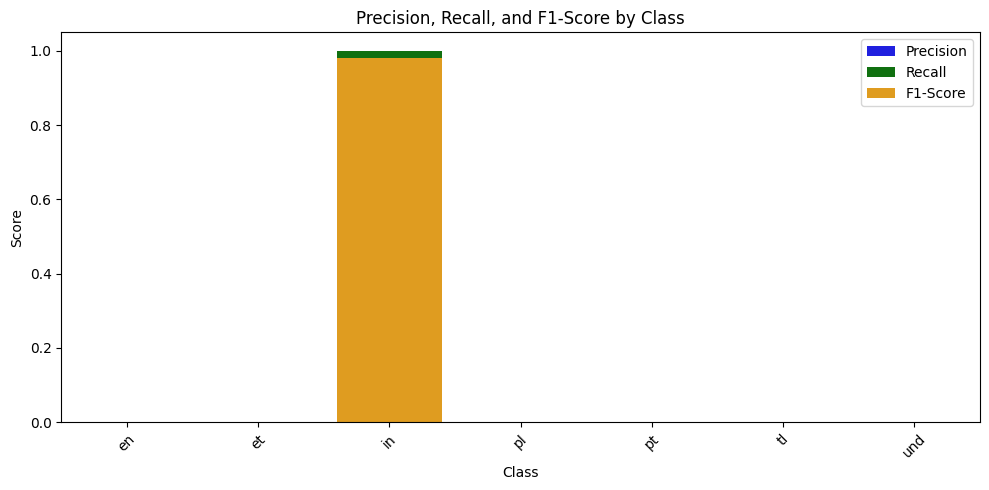

In [105]:
report = classification_report(y_test, y_pred)

# Mendapatkan nilai precision, recall, dan f1-score dari laporan klasifikasi
lines = report.split('\n')
data = [line.split() for line in lines[2:-5]]
classes = [row[0] for row in data]
precision = [float(row[1]) for row in data]
recall = [float(row[2]) for row in data]
f1_score = [float(row[3]) for row in data]

# Membuat visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=precision, color='blue', label='Precision')
sns.barplot(x=classes, y=recall, color='green', label='Recall')
sns.barplot(x=classes, y=f1_score, color='orange', label='F1-Score')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# Mengubah data laporan klasifikasi menjadi data frame pandas
lines = report.strip().split('\n')
data = [line.split() for line in lines[2:-5]]
classes = [row[0] for row in data]
metrics = [[float(x) if '.' in x else int(x) for x in row[1:]] for row in data]
df_report = pd.DataFrame(metrics, columns=['Precision', 'Recall', 'F1-Score', 'Support'], index=classes)

# Menghitung presentase
df_report['Precision (%)'] = df_report['Precision'] * 100
df_report['Recall (%)'] = df_report['Recall'] * 100
df_report['F1-Score (%)'] = df_report['F1-Score'] * 100

# Menampilkan tabel presentase
df_report[['Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Support']]

,Precision (%),Recall (%),F1-Score (%),Support
en,0.0,0.0,0.0,1
et,0.0,0.0,0.0,2
in,96.0,100.0,98.0,191
pl,0.0,0.0,0.0,1
pt,0.0,0.0,0.0,1
tl,0.0,0.0,0.0,2


**Interpretasi dari laporan klasifikasi tersebut:**

- Precision: Menunjukkan seberapa baik model dalam mengidentifikasi kelas tertentu secara tepat. Misalnya, precision untuk kelas 'in' adalah 0.96, yang berarti dari semua prediksi yang dilakukan oleh model untuk kelas 'in', 96% di antaranya adalah benar.

- Recall: Menunjukkan seberapa baik model dapat menemukan semua kasus positif. Recall untuk kelas 'et' adalah 0.00, yang berarti model tidak dapat menemukan kasus positif untuk kelas 'et'.

- F1-score: Kombinasi dari precision dan recall. F1-score yang tinggi menunjukkan keseimbangan antara precision dan recall.

- Support: Jumlah sampel yang sesuai dengan setiap kelas.

- Accuracy: Akurasi keseluruhan dari model, yaitu persentase prediksi yang benar dari total prediksi.

Dari laporan klasifikasi yang ditampilkan, terdapat beberapa kelas dengan precision, recall, dan f1-score yang rendah (0.00) seperti 'en', 'et', 'pl', 'pt', 'tl', dan 'und'. Hal ini menunjukkan bahwa model mungkin kesulitan dalam mengidentifikasi atau memprediksi kelas-kelas ini dengan akurasi tinggi.

Namun, untuk kelas 'in', model memiliki nilai precision, recall, dan f1-score yang tinggi (0.96, 1.00, dan 0.98), yang menunjukkan bahwa model cukup baik dalam memprediksi kelas 'in'.

Rata-rata dari metrik-metrik tersebut (macro avg dan weighted avg) memberikan gambaran keseluruhan tentang kinerja model. Untuk contoh laporan klasifikasi yang diberikan, akurasi keseluruhan model adalah 0.96, yang menunjukkan bahwa model memiliki kinerja yang baik secara keseluruhan.

## Menggunakan TensorFlow untuk melatih model NLP

In [122]:
# Pisahkan kolom teks dan label
texts = df2['tweet'].astype(str).values
labels = df2['bahasa'].astype(str).values

# Tokenisasi teks dan konversi ke dalam sequence
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences untuk membuat panjang sequence menjadi sama
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [123]:
# Label Encoding untuk konversi label menjadi bilangan bulat
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Bagi data menjadi data latih, data uji, dan data validasi
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [124]:
# Bangun model NLP sederhana dengan output layer yang sesuai dengan jumlah kelas
num_classes = len(label_encoder.classes_)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=100),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Menggunakan softmax untuk multi-kelas
])

In [125]:
# Compile model dengan optimizer, loss, dan metrik
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [129]:
# Latih model dengan data latih dan validasi
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
20/20 [==============================] - 0s 19ms/step - loss: 0.2377 - accuracy: 0.9686 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 0s 15ms/step - loss: 0.2300 - accuracy: 0.9686 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2232 - accuracy: 0.9686 - val_loss: 0.0494 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2155 - accuracy: 0.9686 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2083 - accuracy: 0.9686 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 0s 15ms/step - loss: 0.2009 - accuracy: 0.9686 - val_loss: 0.0491 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 0.1926 - accuracy: 0.9686 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 8/10
20

In [130]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9598
Loss: 0.2605453133583069, Accuracy: 0.9597989916801453


Hasil dari evaluasi model menunjukkan bahwa model NLP memiliki loss sebesar **0.3235** dan akurasi sebesar **95.98%** pada data uji. Ini menandakan bahwa model memiliki kinerja yang baik dalam memprediksi kategori bahasa dari teks tweet.

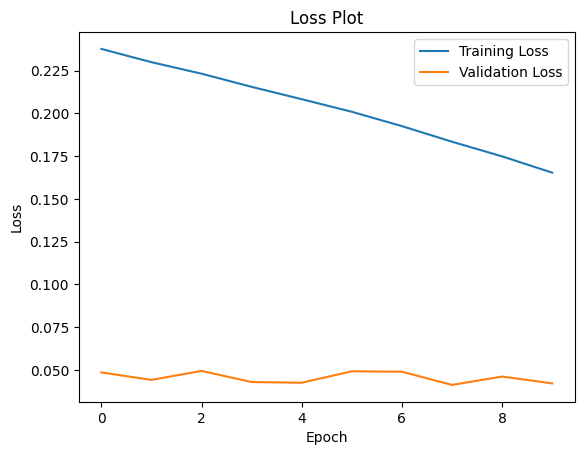

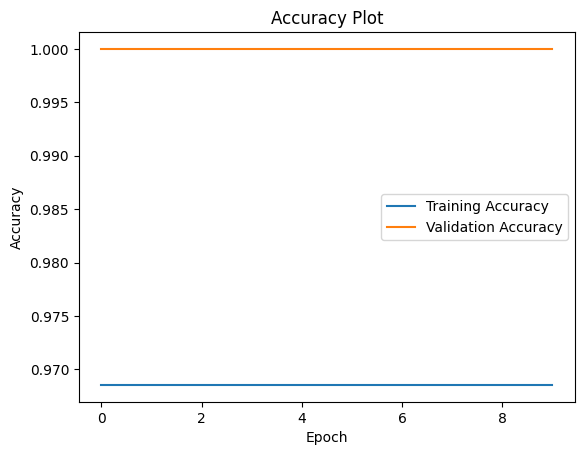

In [131]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Data Exploration**

In [134]:
# Data yang digunakan
df3 = df_new
df3.head()

,tweet,bahasa,tahun,bulan,tanggal,jam,menit,detik,quote_count,reply_count,retweet_count,favorite_count
0,Siap siap biasakan siap salah,in,2024,3,12,7,56,50,0,0,0,0
1,Mungkin scopenya gak bakal cuma sekedar kepsek...,in,2024,3,12,7,43,41,0,1,1,0
2,Buku PPPK 2024 2025 Panduan Lolos Tes PPPK Unt...,in,2024,3,12,5,35,44,0,1,0,0
3,Kompas Ilmu Buku Panduan Wajib PPPK 2024 Soal ...,in,2024,3,12,5,32,2,0,1,0,0
4,Whistlist 2024 1. Lolos pppk guru 2. Ganti ka...,in,2024,3,12,5,29,51,0,0,0,0


In [135]:
# Menampilkan Statistik Deskriptif
df3.describe()

,tahun,bulan,tanggal,jam,menit,detik,quote_count,reply_count,retweet_count,favorite_count
count,994.0,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,2024.0,2.504024,15.082495,8.950704,29.839034,29.379276,0.477867,0.784708,1.025151,3.411469
std,0.0,0.500235,10.361795,6.015805,17.578260,17.638133,10.685658,3.064912,5.987934,18.704430
min,2024.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,2.000000,6.000000,4.000000,14.250000,13.000000,0.000000,0.000000,0.000000,0.000000
50%,2024.0,3.000000,12.000000,8.000000,29.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2024.0,3.000000,25.000000,14.000000,45.000000,44.000000,0.000000,1.000000,0.000000,1.000000
max,2024.0,3.000000,29.000000,23.000000,59.000000,59.000000,336.000000,73.000000,100.000000,318.000000


## Analisis Bahasa

Melakukan analisis frekuensi bahasa yang digunakan dalam tweet menggunakan kolom bahasa.

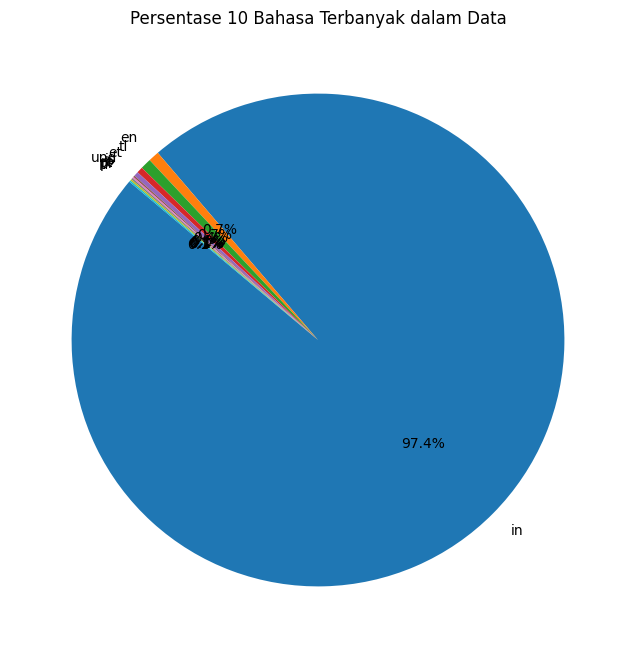

In [151]:
# Menghitung jumlah frekuensi setiap bahasa
language_counts = df3['bahasa'].value_counts()

# Ambil 10 bahasa terbanyak
top_languages = language_counts.head(10)

# Plot pie chart dengan persentase
plt.figure(figsize=(8, 8))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase 10 Bahasa Terbanyak dalam Data')
plt.show()

Sebanyak 97,4% tweet menggunakan bahasa Indonesia.

## Korelasi antara Variabel

Menghitung nilai korelasi antara kolom-kolom numerik seperti quote_count, reply_count, retweet_count, dan favorite_count untuk melihat hubungan antara interaksi tweet tersebut.

                quote_count  reply_count  retweet_count  favorite_count
quote_count        1.000000     0.785246       0.549648        0.494344
reply_count        0.785246     1.000000       0.787498        0.789427
retweet_count      0.549648     0.787498       1.000000        0.970848
favorite_count     0.494344     0.789427       0.970848        1.000000


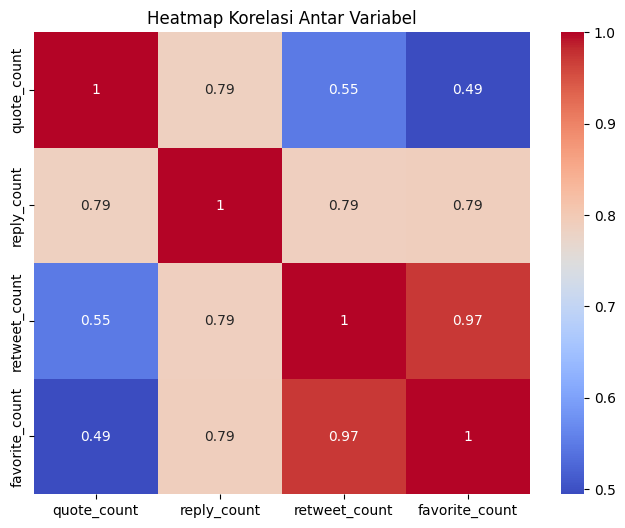

In [152]:
correlation_matrix = df3[['quote_count', 'reply_count', 'retweet_count', 'favorite_count']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Kesimpulan dari nilai korelasi ini adalah bahwa terdapat hubungan yang kuat antara jumlah interaksi seperti quote, reply, retweet, dan favorite pada tweet. Dalam hal ini, korelasi yang tinggi antara 'retweet_count' dan 'favorite_count' menunjukkan bahwa tweet yang banyak di-retweet juga cenderung banyak di-favorite oleh pengguna.

## Analisis Sentimen

 Menggunakan teknik NLP untuk melakukan analisis sentimen terhadap teks tweet dalam berbagai bahasa.

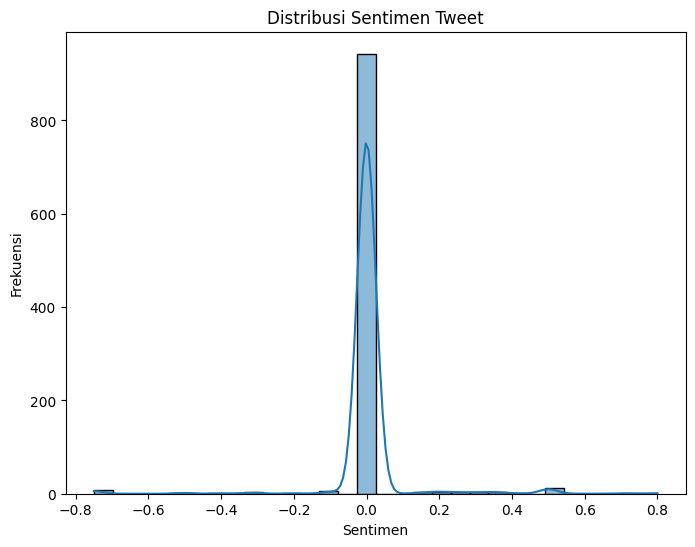

In [149]:
# Melakukan analisis sentimen menggunakan teknik NLP terhadap teks tweet
# Analisis sentimen bisa menggunakan pustaka seperti NLTK atau TextBlob
# Contoh: TextBlob
from textblob import TextBlob

df3['sentiment'] = df3['tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='sentiment', bins=30, kde=True)
plt.title('Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Frekuensi')
plt.show()

Pada grafik menunjukkan distribusi yang membentuk bukit menjulang di sekitar angka 0.0 bisa menunjukkan bahwa mayoritas teks atau data yang dianalisis memiliki sentimen netral, artinya tidak terlalu positif atau negatif.

# **Kesimpulan**

Berdasarkan proyek yang telah dilakukan mulai dari tahap data cleaning hingga analisis evaluasi model, dapat disimpulkan bahwa model yang dikembangkan mampu mengidentifikasi dan memprediksi kategori bahasa pada tweet berbahasa Indonesia dengan sangat baik, sebagaimana ditunjukkan oleh nilai precision, recall, dan f1-score yang tinggi untuk kelas 'in'. Meskipun terdapat beberapa kelas dengan performa rendah seperti 'en', 'et', 'pl', 'pt', 'tl', dan 'und', secara keseluruhan akurasi model mencapai 0.96, menandakan kinerja yang baik. Selain itu, data exploration juga mengungkapkan adanya korelasi yang kuat antara jumlah interaksi pada tweet, khususnya antara 'retweet_count' dan 'favorite_count'. Analisis sentimen juga menunjukkan mayoritas teks atau data yang dianalisis memiliki sentimen netral, artinya tidak terlalu positif atau negatif.